In [1]:
library("dplyr")
library("ggplot2")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Importing DataSets - Title Crew and Ratings

In [2]:
title_crew=read.delim('IMDb_Datasets_Filtered/filtered_title_crew.tsv')
title_ratings=read.delim('IMDb_Datasets_Filtered/filtered_title_ratings.tsv')

## 1st - Crew

In [3]:
head(title_crew)
tail(title_crew)

,tconst,directors,writers
,<chr>,<chr>,<chr>
1,tt0000001,nm0005690,\N
2,tt0000002,nm0721526,\N
3,tt0000003,nm0721526,\N
4,tt0000004,nm0721526,\N
5,tt0000005,nm0005690,\N
6,tt0000006,nm0005690,\N


,tconst,directors,writers
,<chr>,<chr>,<chr>
1443754,tt9916724,nm0652213,nm0652213
1443755,tt9916730,nm10538612,nm10538612
1443756,tt9916754,"nm9272490,nm8349149","nm8349149,nm9272490"
1443757,tt9916756,nm10538639,nm10538639
1443758,tt9916764,nm6685122,"nm6687687,nm10538642,nm9641593,nm10538643"
1443759,tt9916856,nm10538645,nm6951431


In [4]:
tc_clean=title_crew #Changes will be made in the tc_clean

In [5]:
nrow(tc_clean[tc_clean$directors=='\\N',])/nrow(tc_clean) #Percentage of movies without directors

[1] 0.1077001

In [6]:
nrow(tc_clean[tc_clean$writers=='\\N',])/nrow(tc_clean) #Percentage of movies without writers

[1] 0.2804824

In [7]:
nrow(tc_clean[tc_clean$writers=='\\N' & tc_clean$directors=='\\N',])/nrow(tc_clean)
#8% of movies don't have a director nor a writer, so they shall be removed

[1] 0.07833025

In [8]:
tc_clean=tc_clean[tc_clean$writers!='\\N' | tc_clean$directors!='\\N',] #Removing the mentioned rows

In [9]:
nrow(tc_clean[tc_clean$writers=='\\N' & tc_clean$directors=='\\N',]) #Everything went OKAY

[1] 0

In [10]:
nrow(tc_clean)

[1] 1330669

In [11]:
library(stringr)
tc_clean$directors=str_split(tc_clean$directors,',')
tc_clean$writers=str_split(tc_clean$writers,',')
#Now, the elements of each column are lists

In [37]:
head(tc_clean)
tail(tc_clean)

,tconst,n_directors,n_writers
,<chr>,<int>,<int>
1,tt0000001,1,1
2,tt0000002,1,1
3,tt0000003,1,1
4,tt0000004,1,1
5,tt0000005,1,1
6,tt0000006,1,1


,tconst,n_directors,n_writers
,<chr>,<int>,<int>
1443754,tt9916724,1,1
1443755,tt9916730,1,1
1443756,tt9916754,2,2
1443757,tt9916756,1,1
1443758,tt9916764,1,4
1443759,tt9916856,1,1


In [30]:
tc_clean$n_directors=lengths(tc_clean$directors) #New column with the number of directors

In [32]:
tc_clean$n_writers=lengths(tc_clean$writers) #New column with the number of writers

In [34]:
tc_clean$directors=NULL #Removing the director's column

In [36]:
tc_clean$writers=NULL #Removing writer's column

In [13]:
max(lengths(tc_clean$directors)) #There's a movie with 320 directors...
lengths(tc_clean[lengths(tc_clean$directors)>10,]) #There are 371 movies with more than 10 directors

[1] 320

tconst directors   writers 
      371       371       371

In [14]:
max(lengths(tc_clean$writers)) #There's a movie with 63 writers...
lengths(tc_clean[lengths(tc_clean$writers)>10,]) #There are 512 movies with more than 10 writers

[1] 63

tconst directors   writers 
      512       512       512

Warning message:
“Removed 1919 rows containing non-finite values (stat_count).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


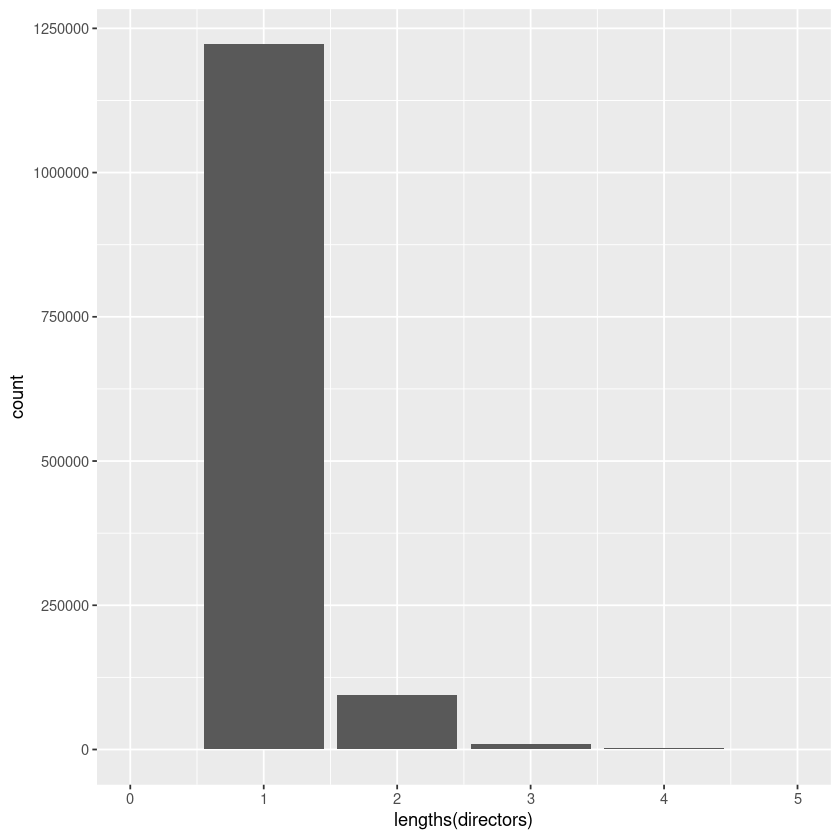

In [15]:
ggplot(tc_clean,aes(x=lengths(directors)))+
    geom_bar()+
    xlim(0,5)

In [38]:
library(readr)
write_tsv(tc_clean,'cleaned_filtered_title_crew.tsv') #It doesn't let me save the file

## 2nd - Ratings

In [17]:
tr_clean=title_ratings #Changes will be performed in the tr_clean dataset

In [18]:
head(tr_clean)
tail(tr_clean)

,tconst,averageRating,numVotes
,<chr>,<dbl>,<int>
1,tt0000001,5.6,1654
2,tt0000002,6.1,199
3,tt0000003,6.5,1366
4,tt0000004,6.2,121
5,tt0000005,6.2,2149
6,tt0000006,5.3,115


,tconst,averageRating,numVotes
,<chr>,<dbl>,<int>
423178,tt9916192,7.4,9
423179,tt9916362,6.3,104
423180,tt9916428,4.1,11
423181,tt9916538,8.4,5
423182,tt9916544,7.2,24
423183,tt9916720,6.0,64


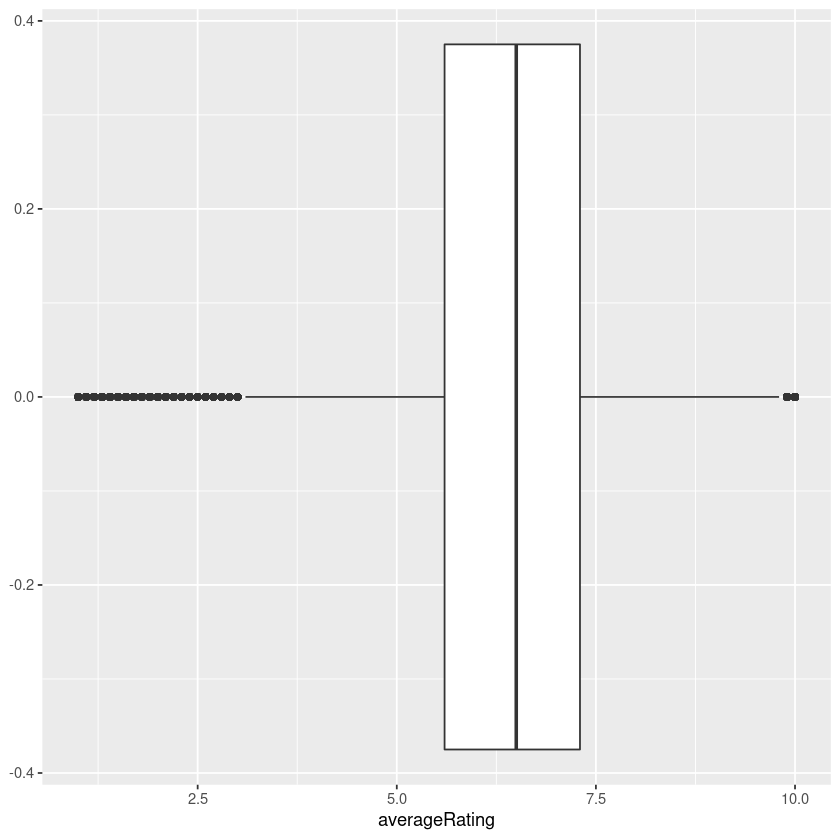

In [19]:
ggplot(tr_clean,aes(x=averageRating))+
    geom_boxplot()

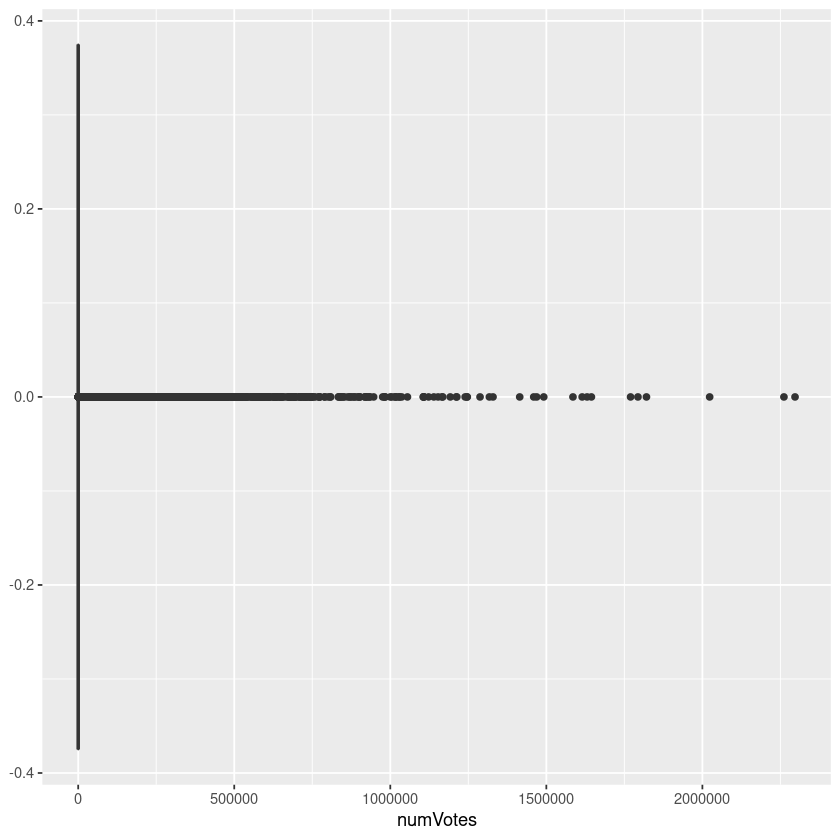

In [20]:
ggplot(tr_clean,aes(x=numVotes))+     
    geom_boxplot()

In [21]:
subset(tr_clean,averageRating<0 | averageRating>10) #We don't have stupid ratings

tconst,averageRating,numVotes
<chr>,<dbl>,<int>


In [22]:
subset(tr_clean,numVotes<=0) #Nor we have a non-positive number of votes

tconst,averageRating,numVotes
<chr>,<dbl>,<int>


# adfsfwf

In [23]:
title_akas=read.delim('IMDb_Datasets_Filtered/filtered_title_akas.tsv')

In [24]:
head(title_akas)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,tt0000001,1,ÐšÐ°Ñ€Ð¼ÐµÐ½ÑÑ–Ñ‚Ð°,UA,\N,imdbDisplay,\N,0
2,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
3,tt0000001,3,Carmencita - spanyol tÃ¡nc,HU,\N,imdbDisplay,\N,0
4,tt0000001,4,ÎšÎ±ÏÎ¼ÎµÎ½ÏƒÎ¯Ï„Î±,GR,\N,imdbDisplay,\N,0
5,tt0000001,5,ÐšÐ°Ñ€Ð¼ÐµÐ½ÑÐ¸Ñ‚Ð°,RU,\N,imdbDisplay,\N,0
6,tt0000001,6,Carmencita,US,\N,\N,\N,0


In [25]:
above3d=tc_clean[lengths(tc_clean$directors)>3,1] #Movies with more than 3 directors

In [26]:
length(above3d) #Number of movies with more than 3 directors

[1] 5366

In [27]:
tc_clean[lengths(tc_clean$directors)==320,]

,tconst,directors,writers
,<chr>,<list>,<list>
529730,tt11886912,"nm0496172 , nm0155683 , nm0656584 , nm0112621 , nm0001929 , nm1856696 , nm0653366 , nm0217148 , nm0652823 , nm0047658 , nm0657484 , nm0059981 , nm0643130 , nm0044310 , nm0219136 , nm0842918 , nm0003029 , nm0669704 , nm0619738 , nm0042848 , nm0619614 , nm2400834 , nm0617736 , nm0613587 , nm1589892 , nm0002191 , nm0490694 , nm0603294 , nm0596962 , nm0066667 , nm0845386 , nm0040939 , nm0110300 , nm0221611 , nm0002218 , nm0038449 , nm0586123 , nm0116166 , nm1834139 , nm0582841 , nm0490324 , nm1195545 , nm0035993 , nm1192762 , nm0034079 , nm5018794 , nm6327278 , nm0221711 , nm0821637 , nm0553309 , nm1816892 , nm0149594 , nm0553303 , nm0677546 , nm0126898 , nm0551761 , nm0030681 , nm0551217 , nm1285812 , nm0222135 , nm4059694 , nm0545701 , nm0029268 , nm0449394 , nm0545393 , nm0028998 , nm0545382 , nm0000894 , nm0679928 , nm0195537 , nm0681412 , nm0028470 , nm0539667 , nm1313798 , nm0127804 , nm0069711 , nm0537626 , nm0028317 , nm0682692 , nm0232832 , nm0071117 , nm0025534 , nm1140699 , nm0684171 , nm0234672 , nm0506584 , nm0023832 , nm0506518 , nm4955199 , nm1392986 , nm0237547 , nm0350597 , nm1967121 , nm0684226 , nm0851724 , nm0021577 , nm0071379 , nm0685494 , nm0016900 , nm0529706 , nm0994546 , nm0015533 , nm0237876 , nm0073384 , nm0002020 , nm1303965 , nm0957794 , nm0074213 , nm0527852 , nm0813219 , nm0524568 , nm0001901 , nm0132064 , nm4805424 , nm0856500 , nm0000254 , nm0520569 , nm2130235 , nm0238475 , nm0518027 , nm0955026 , nm6291971 , nm0517975 , nm0008506 , nm0694946 , nm0515201 , nm0007814 , nm0513371 , nm0075650 , nm0858224 , nm1464594 , nm0239725 , nm0133028 , nm0859323 , nm0952148 , nm0146637 , nm11388447, nm0512071 , nm0181745 , nm1093478 , nm0699095 , nm0510233 , nm0107896 , nm2284662 , nm0241487 , nm0509302 , nm0941868 , nm0860019 , nm0504618 , nm0504267 , nm1680298 , nm0500976 , nm0181117 , nm1464507 , nm0076889 , nm0004202 , nm1179406 , nm0494558 , nm0077014 , nm11393715, nm0000962 , nm0494557 , nm0912224 , nm0077911 , nm0179576 , nm1269163 , nm0244378 , nm0494025 , nm0707466 , nm0252634 , nm0489309 , nm1135994 , nm0906174 , nm0811773 , nm0485939 , nm10962448, nm0710639 , nm0861292 , nm0078363 , nm0078465 , nm0483770 , nm0156694 , nm0712995 , nm0713042 , nm0261198 , nm0482532 , nm11390709, nm7114265 , nm0807704 , nm0714534 , nm0470443 , nm0468007 , nm0173916 , nm0000300 , nm0460120 , nm1311155 , nm3294643 , nm3035371 , nm0169699 , nm0736644 , nm0901799 , nm0458251 , nm0265724 , nm2025003 , nm0444244 , nm0439748 , nm0871779 , nm0000945 , nm0438051 , nm0434806 , nm1539008 , nm2928499 , nm0434701 , nm0738311 , nm0084492 , nm1196219 , nm0969395 , nm0099324 , nm1174756 , nm0084585 , nm0141142 , nm0418450 , nm0266862 , nm0415658 , nm0411556 , nm0267293 , nm0803066 , nm0407263 , nm0745973 , nm0268999 , nm0169245 , nm0399475 , nm0134559 , nm2004352 , nm0747690 , nm0898603 , nm11390699, nm1864602 , nm0382327 , nm0994651 , nm0167388 , nm0086920 , nm0749439 , nm0755389 , nm0004124 , nm0897957 , nm0271408 , nm0375469 , nm0371890 , nm0757958 , nm0897138 , nm0758933 , nm0086924 , nm0273862 , nm0897045 , nm6015437 , nm0345948 , nm0873211 , nm0802807 , nm0273863 , nm0350168 , nm1061623 , nm0141140 , nm0762201 , nm0086952 , nm0098953 , nm0347482 , nm0086992 , nm3772539 , nm0347473 , nm0094726 , nm0163022 , nm3176551 , nm0897017 , nm0876146 , nm0334488 , nm0274262 , nm0157145 , nm1062000 , nm0332648 , nm0778144 , nm0332647 , nm0779970 , nm0161717 , nm0895759 , nm0096773 , nm0278705 , nm0323937 , nm1175531 , nm11390698, nm0781748 , nm0283997 , nm0321403 , nm0785782 , nm1497208 , nm1051422 , nm0290425 , nm0320868 , nm0895752 , nm0098639 , nm0320762 , nm0796318 , nm1902512 , nm0797631 , nm0319624 , nm0003999 , nm0137228 , nm0315865 , nm0894439 , nm0798821 , nm0315591 , nm1779822 , nm0800098 , nm1202716 , nm4045057 , nm0312784 , nm0098793 , nm0309697 , nm0801533 , nm0894742",nm11388447
